# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

**Table of contents**<a id='toc0_'></a>    
- 1. [Imports and model class](#toc1_)
- 2. [Question 1: Illustrate in Edgeworth box](#toc2_)    
- 3. [Question 2: Calculate the error in the market clearing condition s](#toc3_)
- 4. [Question 3: What is the market clearing price?](#toc4_)
- 5. [Question 4a: Find the allocation if only prices in P1 can be chosen](#toc5_)
- 6. [Question 4b: Find the allocation if any positive price can be chosen](#toc6_)
- 7. [Question 5a: Find the allocation if the choice set is restricted to C](#toc7_)
- 8. [Question 5b: Find the allocation if no further restrictions are imposed](#toc8_)
- 9. [Question 6a: Find the resulting allocation](#toc9_)
- 10. [Question 6b: Illustrate and compare our results in question 3-5, and discuss pros and cons of the various allocations](#toc10_)
- 11. [Question 7: Draw a set W with 50 elements](#toc11_)
- 12. [Question 8: Find the market equilibrium allocation for each w^A belonging to C and plot them in the Edgeworth box](#toc12_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc1_)

In [6]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
#Model class recieved from Jeppe Druedahl
from ExchangeEconomy import ExchangeEconomyClass

Imports and set magics:

In [9]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Question 1: Illustrate in Edgeworth box](#toc2_)

We start by illustrating the given exchange economy between consumer A and B with an Edgeworth Box.

**Explain how you solve the model**

In [22]:
model = ExchangeEconomyClass()

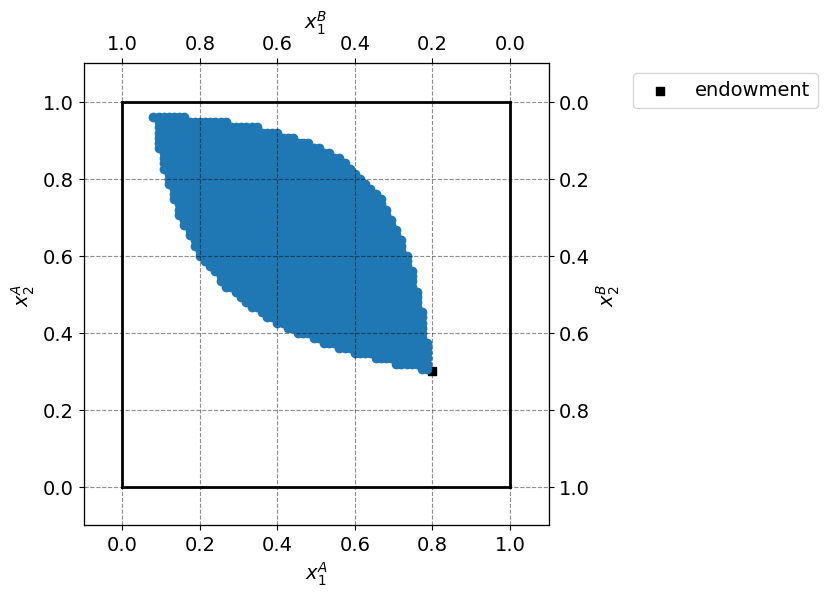

In [34]:
#We create our Edgeworth Box

par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

N = 75
x_grid = np.linspace(0, 1, N+1)

p_imp_good1 = [] #An empty list for the pareto improvment for good 1
p_imp_good2 = [] 

#Finding the utility with the given endowments

u_A_in = model.utility_A(par.w1A, par.w2A)
u_B_in = model.utility_B(1-par.w1A, 1-par.w2A)

for x1A in x_grid:
    for x2A in x_grid: 
        ua = model.utility_A(x1A, x2A)
        ub = model.utility_B(1-x1A, 1-x2A)
        if ua >= u_A_in and ub >= u_B_in:
            p_imp_good1.append(x1A)
            p_imp_good2.append(x2A)


# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

ax_A.scatter(p_imp_good1, p_imp_good2)



In [20]:
# code for solving the model (remember documentation and comments)

a = np.array([1,2,3])
b = inauguralproject.square(a)
print(b)

[1 4 9]


## 3. <a id='toc3_'></a>[Question 2: Calculate the error in the market clearing condition s](#toc3_)

Explain your code and procedure

In [3]:
# code

## 4. <a id='toc4_'></a>[Question 3: What is the market clearing price?](#toc4_)

Explain your code and procedure

In [4]:
# code

ADD CONCISE CONLUSION.

## 5. <a id='toc5_'></a>[Question 4a: Find the allocation if only prices in P1 can be chosen](#toc5_)


## 6. <a id='toc6_'></a>[Question 4b: Find the allocation if any positive price can be chosen](#toc6_)

## 7. <a id='toc7_'></a>[Question 5a: Find the allocation if the choice set is restricted to C](#toc7_)

## 8. <a id='toc8_'></a>[Question 5b: Find the allocation if no further restrictions are imposed](#toc8_)

## 9. <a id='toc9_'></a>[Question 6a: Find the resulting allocation](#toc9_)

## 10. <a id='toc10_'></a>[Question 6b: Illustrate and compare our results in question 3-5, and discuss pros and cons of the various allocations](#toc10_)

## 11. <a id='toc11_'></a>[Question 7: Draw a set W with 50 elements](#toc11_)

## 12. <a id='toc12_'></a>[Question 8: Find the market equilibrium allocation for each w^A belonging to C and plot them in the Edgeworth box](#toc12_)